### Importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
data = pd.read_csv("./data/energy_efficiency_data.csv")

### Data Outline

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Historam of the data features

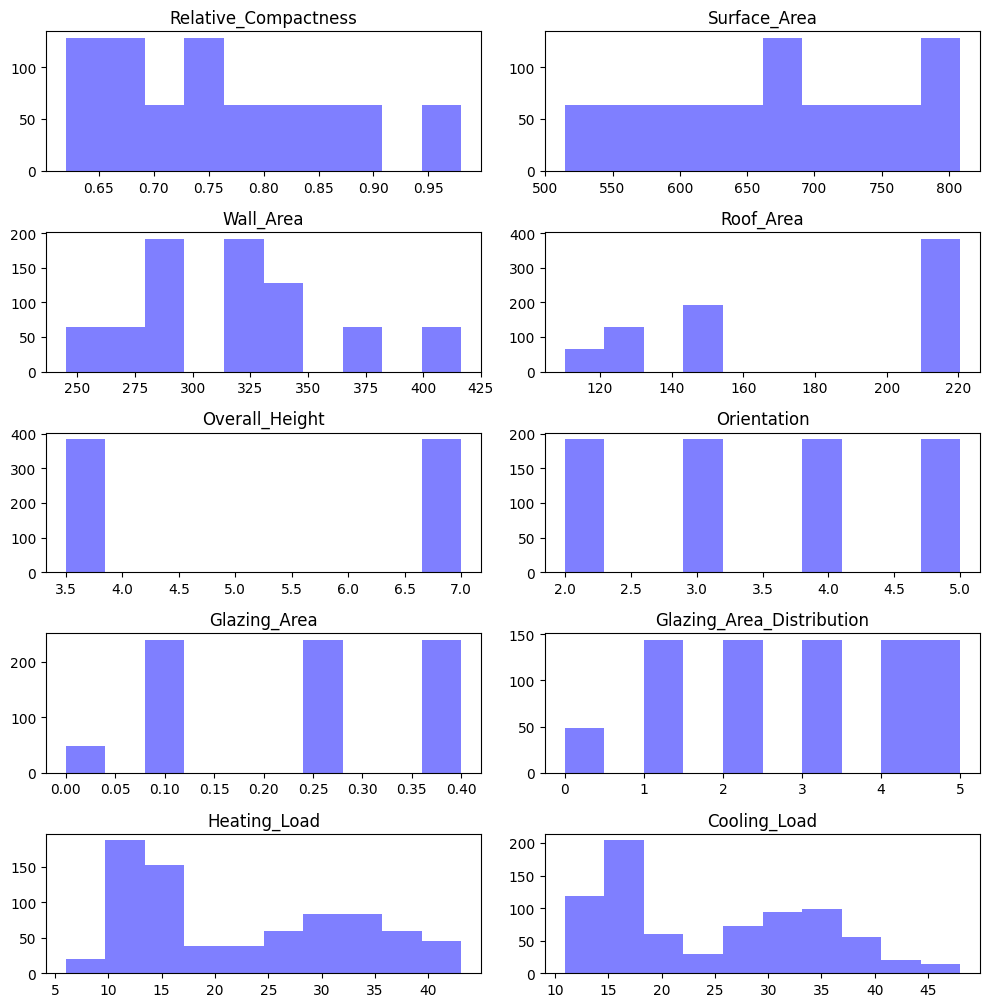

In [5]:
num_list = list(data.columns)

fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(data[num_list[i]],color='blue',alpha=0.5)

plt.tight_layout()

### Pairplot for the data features


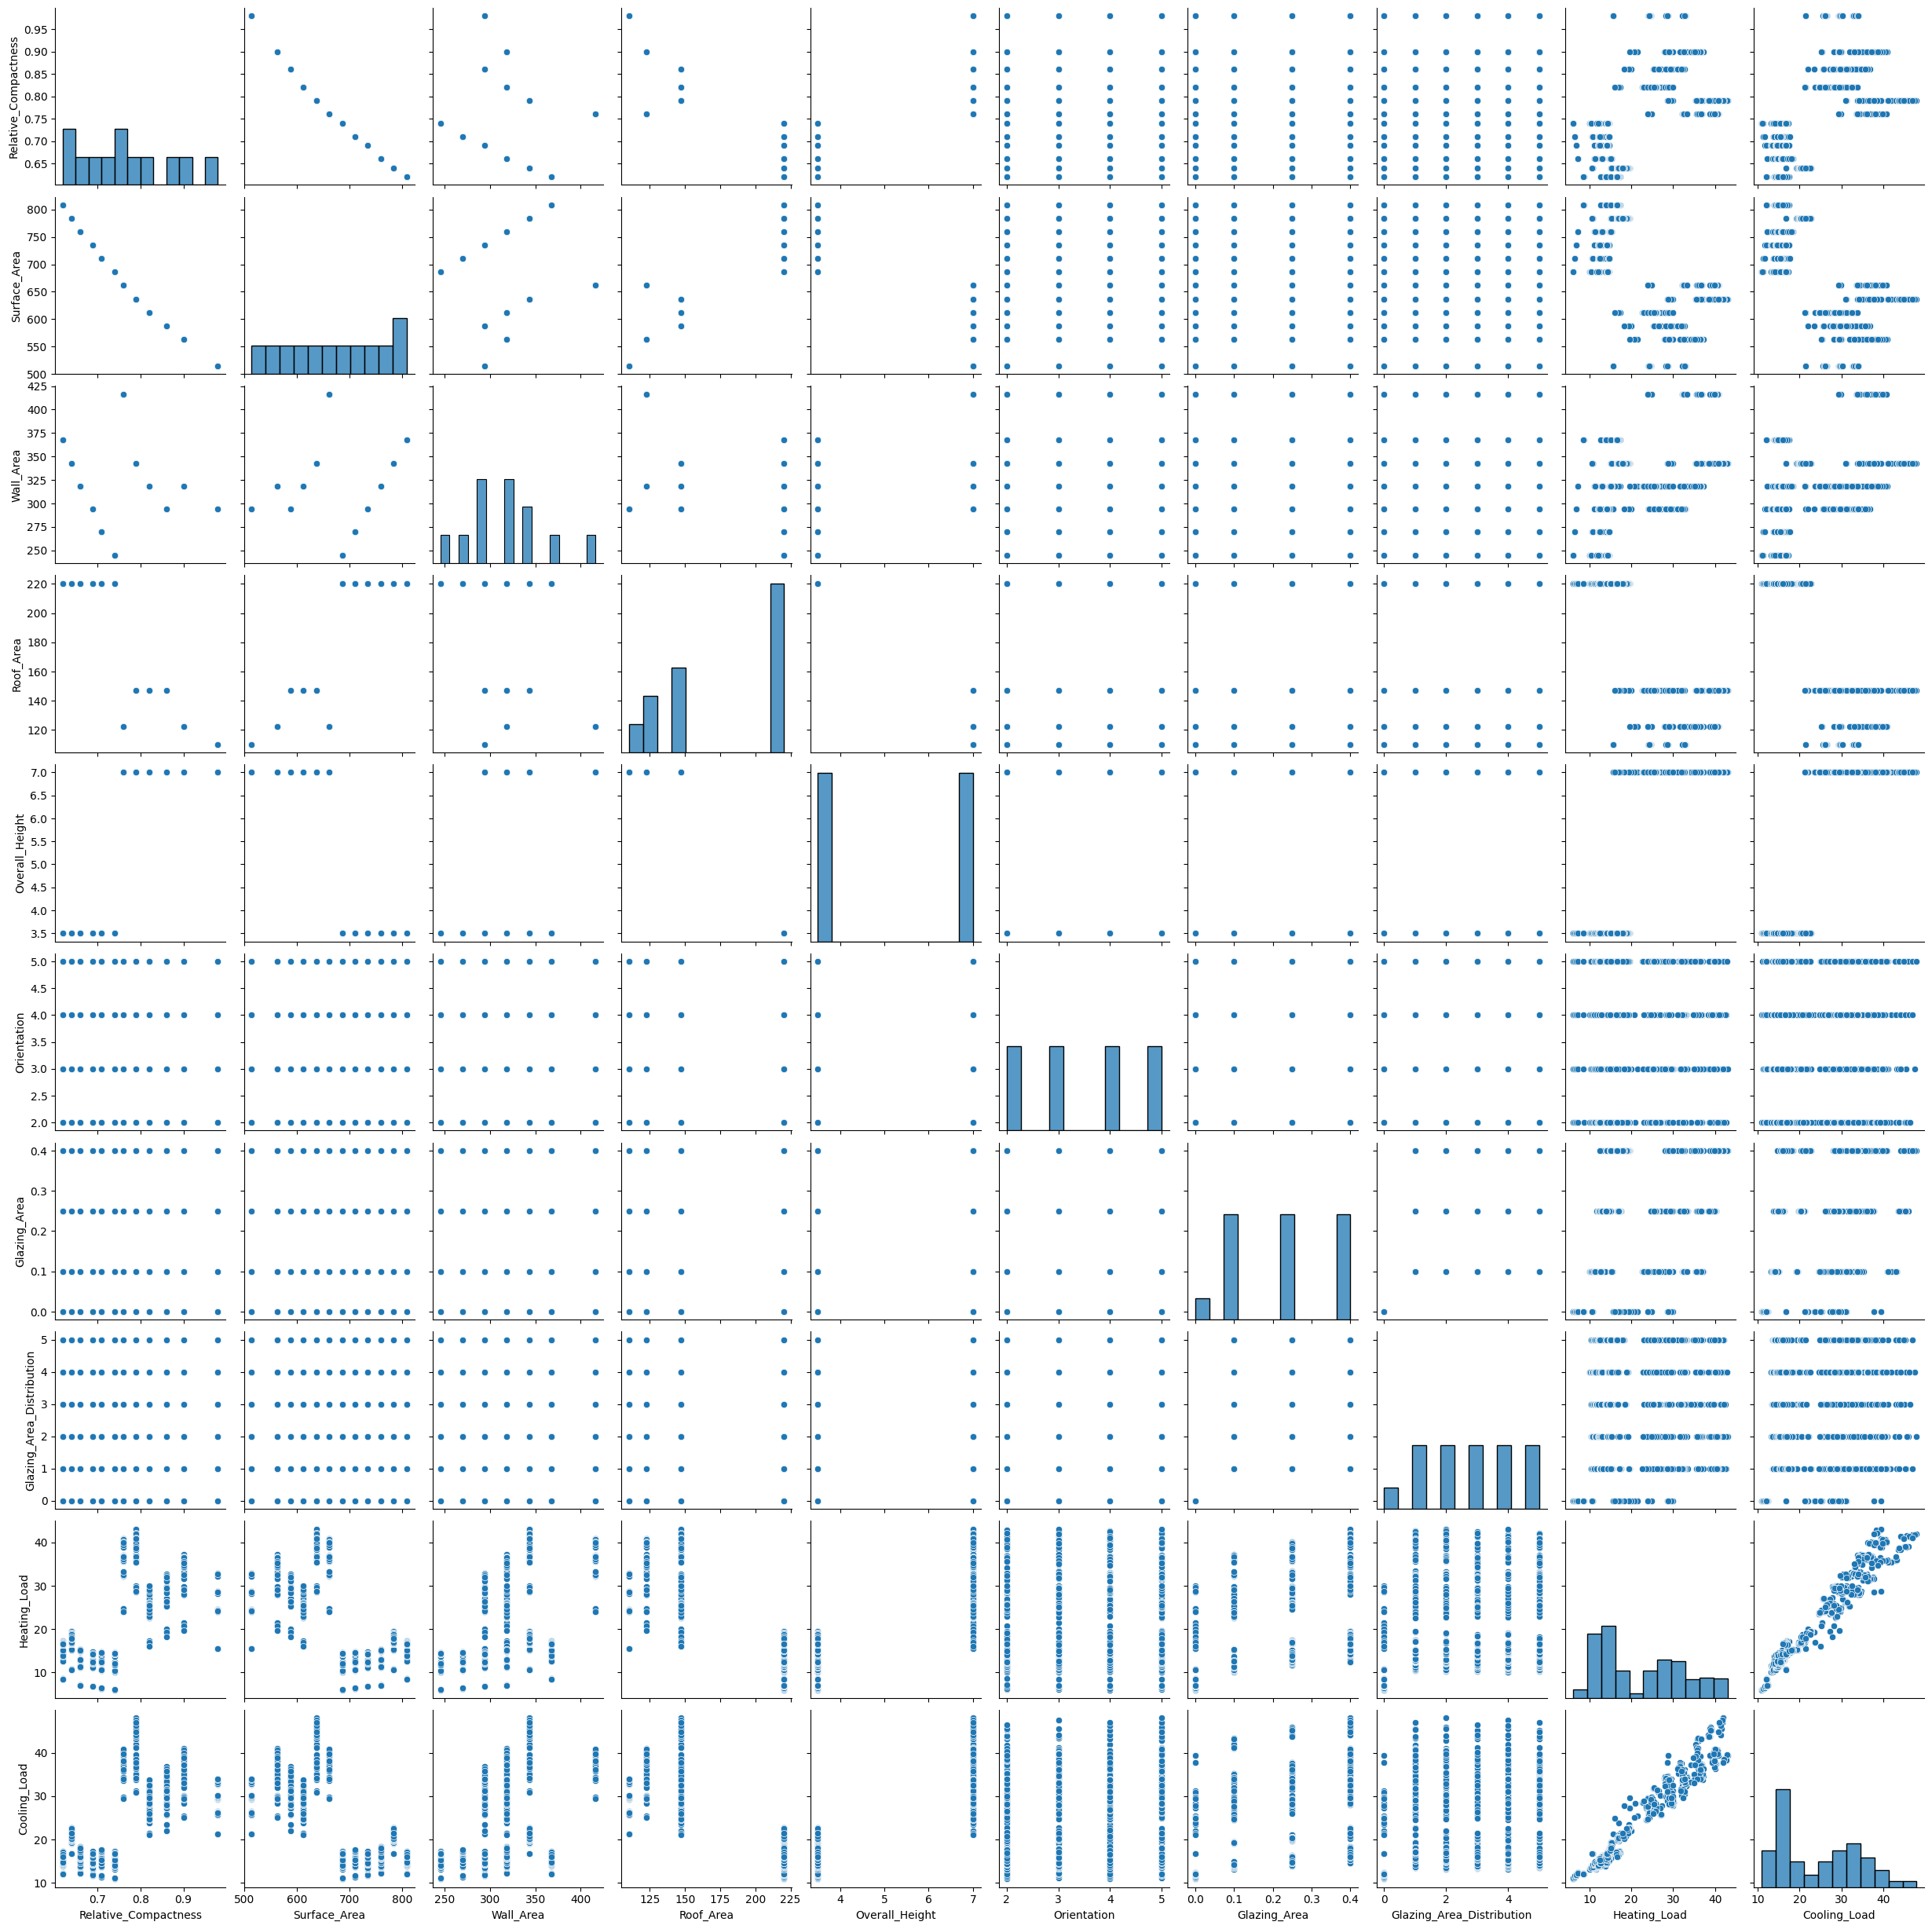

In [6]:
sns.pairplot(data)

### Feature correlations

<Axes: >

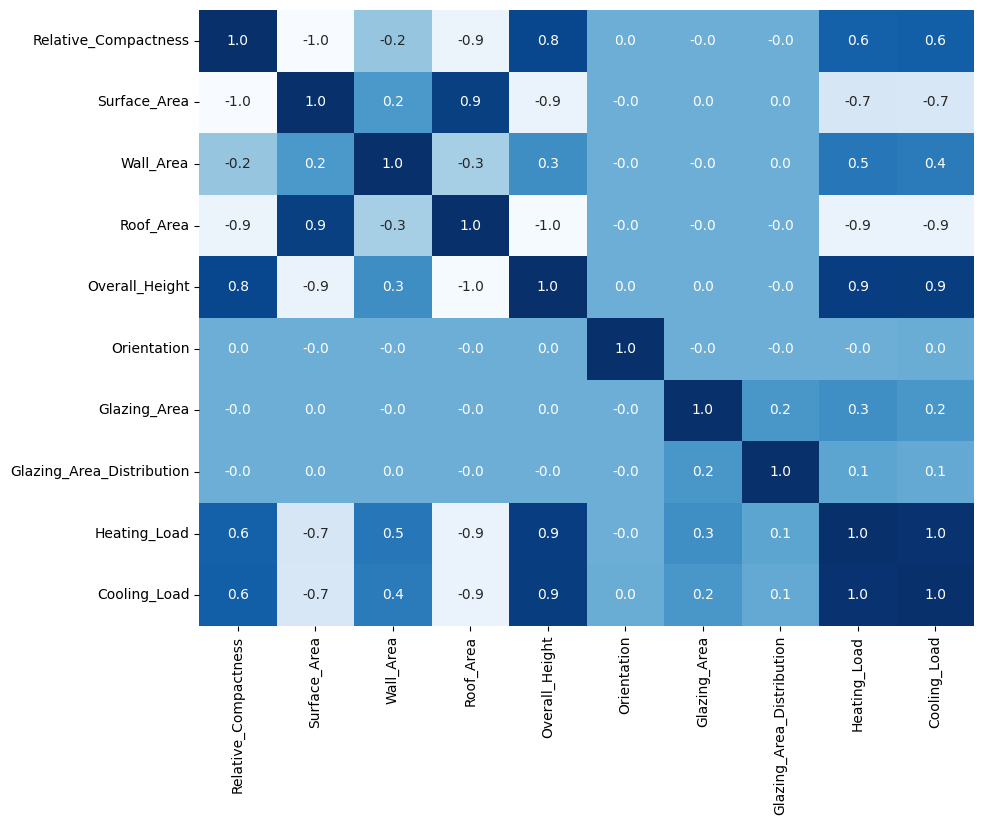

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

### Importing the necessary libraries

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

### Preparing the data


In [9]:
X=data.drop(['Heating_Load','Cooling_Load'],axis=1)
Y = data[['Heating_Load', 'Cooling_Load']]
Y1= data[['Heating_Load']]
Y2= data[['Cooling_Load']]

#### Splitting the data into training and testing sets

In [10]:
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.3, random_state = 20)

#### Normalizing the data

In [11]:
MinMax = MinMaxScaler(feature_range= (0,1))
X_train = MinMax.fit_transform(X_train)
X_test = MinMax.transform(X_test)

#### Define the model


In [12]:
from model import NN

In [13]:
X_train.shape

(537, 8)

In [14]:
input_dim = X_train.shape[1]
model = NN(input_dim)

In [15]:
print(model)

NN(
  (network): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [16]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0, weight_decay=0)

In [17]:
X_train = np.array(X_train)
y1_train = np.array(y1_train)
X_test = np.array(X_test)
y1_test = np.array(y1_test)
y2_train = np.array(y2_train)
y2_test = np.array(y2_test)


In [18]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y1_train_tensor = torch.tensor(y1_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y1_test_tensor = torch.tensor(y1_test, dtype=torch.float32)

y2_train_tensor = torch.tensor(y2_train, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test, dtype=torch.float32)

#### Training

In [19]:
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y1_train_tensor)

    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 51.3964
Epoch 20/100, Loss: 37.5239
Epoch 30/100, Loss: 29.1177
Epoch 40/100, Loss: 25.1701
Epoch 50/100, Loss: 26.1351
Epoch 60/100, Loss: 25.8943
Epoch 70/100, Loss: 20.9633
Epoch 80/100, Loss: 23.4173
Epoch 90/100, Loss: 19.9471
Epoch 100/100, Loss: 18.9670


In [20]:
test_prediction1 = model(X_test_tensor)
test_prediction1 = test_prediction1.detach().numpy()

In [21]:
r2_score(y1_test, test_prediction1)

0.767193071306459

## Optimizing the hyperparameters using MVO

In [22]:
from mvo import MultiverseOptimizer

#### Objective function

In [23]:

def objective_function(params):
    """
    params[0] = learning rate (0.001 to 0.1)
    params[1] = momentum (0 to 0.99)
    params[2] = weight_decay (0.001 to 0.1)
    """
    try:
        lr = float(params[0])
        momentum = float(params[1])
        weight_decay = float(params[2])
        
        if not (0.0001 <= lr <= 0.1 and 0 <= momentum <= 0.99 and 0.0001 <= weight_decay <= 0.1):
            return 1e10
        
        model = NN(input_dim)
        optimizer = optim.SGD(model.parameters(), 
                            lr=lr,
                            momentum=momentum, 
                            weight_decay=weight_decay)
        
        val_losses = []
        max_allowed_loss = 1e10
        
        try:
            for epoch in range(20):
                model.train()
                optimizer.zero_grad()
                predictions = model(X_train_tensor)
                loss = criterion(predictions, y1_train_tensor)
                
                # Check for invalid loss
                if torch.isnan(loss) or torch.isinf(loss) or loss > max_allowed_loss:
                    return max_allowed_loss
                    
                loss.backward()
                optimizer.step()
                
                model.eval()
                with torch.no_grad():
                    val_pred = model(X_test_tensor)
                    val_loss = criterion(val_pred, y1_test_tensor)
                    
                    if torch.isnan(val_loss) or torch.isinf(val_loss) or val_loss > max_allowed_loss:
                        return max_allowed_loss
                        
                    val_losses.append(val_loss.item())
            
            mean_val_loss = np.mean(val_losses)
            
            if np.isnan(mean_val_loss) or np.isinf(mean_val_loss) or mean_val_loss > max_allowed_loss:
                return max_allowed_loss
                
            return mean_val_loss
            
        except RuntimeError as e:
            print(f"Runtime error in training: {str(e)}")
            return max_allowed_loss
            
    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return max_allowed_loss

#### Setup the MVO

In [24]:
dim = 3  # number of hyperparameters
lb = [0.001, 0, 0.001]  # lower bounds
ub = [0.1, 0.99, 0.1]    # upper bounds
num_universes = 50
max_iter = 80

In [25]:
optimizer = MultiverseOptimizer(
    obj_func=objective_function,
    lb=lb,
    ub=ub,
    dim=dim,
    num_universes=num_universes,
    max_iter=max_iter,
    wep_max=1.0,
    wep_min=0.2
)

### Optimizing

#### Helper function

In [26]:
def train_and_evaluate(model, optimizer, epochs, X_train_tensor, y1_train_tensor, X_test_tensor, y1_test_tensor):
    """Helper function to train model and collect metrics"""
    training_losses = []
    validation_losses = []
    criterion = nn.MSELoss()
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train_tensor)
        loss = criterion(predictions, y1_train_tensor)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():
            train_loss = criterion(predictions, y1_train_tensor).item()
            val_pred = model(X_test_tensor)
            val_loss = criterion(val_pred, y1_test_tensor).item()
            
            training_losses.append(train_loss)
            validation_losses.append(val_loss)
    
    model.eval()
    with torch.no_grad():
        final_predictions = model(X_test_tensor).numpy()
        final_r2 = r2_score(y1_test, final_predictions)
        final_mse = mean_squared_error(y1_test, final_predictions)
    
    return {
        'training_losses': training_losses,
        'validation_losses': validation_losses,
        'final_r2': final_r2,
        'final_mse': final_mse,
        'predictions': final_predictions
    }

### Train standard SGD model

In [27]:
standard_model = NN(input_dim)
standard_optimizer = optim.SGD(standard_model.parameters(), lr=0.01, momentum=0.0, weight_decay=0.0)
standard_results = train_and_evaluate(
    standard_model, 
    standard_optimizer, 
    epochs=100,
    X_train_tensor=X_train_tensor,
    y1_train_tensor=y1_train_tensor,
    X_test_tensor=X_test_tensor,
    y1_test_tensor=y1_test_tensor
)

#### Run the optimizer

In [28]:
solution = optimizer.optimize()

MVO is optimizing "objective_function"


At iteration 10 the best fitness (lowest loss) is 40.12572298049927
At iteration 20 the best fitness (lowest loss) is 35.82575540542602
At iteration 30 the best fitness (lowest loss) is 35.82575540542602
At iteration 40 the best fitness (lowest loss) is 33.52744693756104
At iteration 50 the best fitness (lowest loss) is 31.831590366363525
At iteration 60 the best fitness (lowest loss) is 31.831590366363525
At iteration 70 the best fitness (lowest loss) is 31.831590366363525
At iteration 80 the best fitness (lowest loss) is 31.831590366363525


#### Get the best hyperparameters

In [29]:
best_lr, best_momentum, best_weight_decay = solution.bestIndividual
print(f"Best hyperparameters found:")
print(f"Learning rate: {best_lr}")
print(f"Momentum: {best_momentum}")
print(f"Weight decay: {best_weight_decay}")

Best hyperparameters found:
Learning rate: 0.023240240541238414
Momentum: 0.28943888275770346
Weight decay: 0.05572197264611223


### Train the MVO-optimized model

In [30]:
mvo_model = NN(input_dim)
mvo_optimizer = optim.SGD(
    mvo_model.parameters(),
    lr=best_lr,
    momentum=best_momentum,
    weight_decay=best_weight_decay
)
mvo_results = train_and_evaluate(
    mvo_model,
    mvo_optimizer,
    epochs=100,
    X_train_tensor=X_train_tensor,
    y1_train_tensor=y1_train_tensor,
    X_test_tensor=X_test_tensor,
    y1_test_tensor=y1_test_tensor
)

### Comparison

In [31]:
from plot import plot_learning_curves, plot_prediction_comparison

In [32]:
comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'Mean Squared Error'],
    'Standard SGD': [standard_results['final_r2'], standard_results['final_mse']],
    'MVO-optimized SGD': [mvo_results['final_r2'], mvo_results['final_mse']]
})

#### MSE and R2 Comparison Table

In [33]:
print("\nComparison of Standard SGD vs MVO-optimized SGD:")
print("\nHyperparameters:")
print(f"Standard SGD: lr=0.01, momentum=0, weight_decay=0")
print(f"MVO-optimized: lr={best_lr:.6f}, momentum={best_momentum:.6f}, weight_decay={best_weight_decay:.6f}")
print("\nPerformance Metrics:")
print(comparison_df.to_string(index=False))


Comparison of Standard SGD vs MVO-optimized SGD:

Hyperparameters:
Standard SGD: lr=0.01, momentum=0, weight_decay=0
MVO-optimized: lr=0.023240, momentum=0.289439, weight_decay=0.055722

Performance Metrics:
            Metric  Standard SGD  MVO-optimized SGD
          R² Score      0.900280           0.953788
Mean Squared Error     10.424554           4.830932


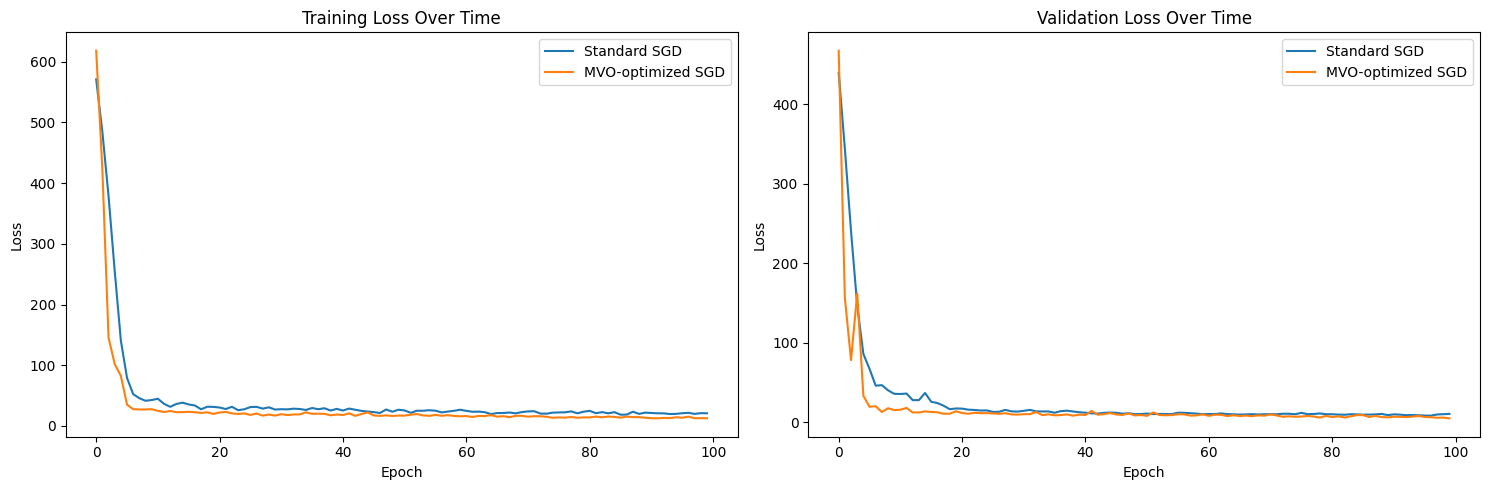

In [36]:
plot_learning_curves(standard_results, mvo_results)

### Plot MVO convergence

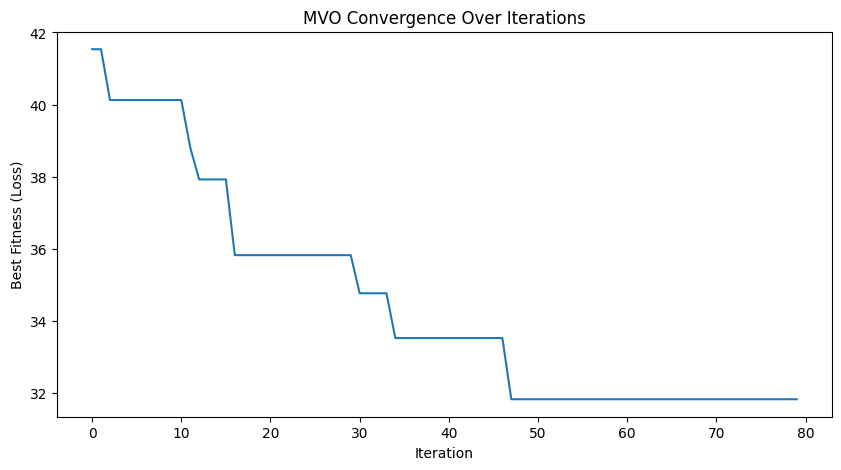

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(solution.convergence)
plt.title('MVO Convergence Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness (Loss)')
plt.show()